In [115]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
day_offset = 2

exp_dir = 'experiments/bert/SP_day_offset_{}'.format(day_offset)
orig_file = 'data/combined_result_day_offset_{}.tsv'.format(day_offset)
true_file = 'glue_data/SP_day_offset_{}/test.tsv'.format(day_offset)
pred_file = '{}/test_results.tsv'.format(exp_dir)

In [119]:
df_orig = pd.read_csv(orig_file, sep='\t')
df_true = pd.read_csv(true_file, sep='\t')
df_pred = pd.read_csv(pred_file, header=None, sep='\t')

In [123]:
# maps the shuffled indices to orig labels
y_true = df_orig.iloc[df_true['index'].values,:]['sp_label'].values
len(y_true)

11725

In [125]:
y_pred = df_pred[1].apply(round).values
len(y_pred)

15304

In [122]:
# tn, fp, fn, tp
cm = confusion_matrix(y_true, y_pred)
cm

ValueError: Found input variables with inconsistent numbers of samples: [11725, 15304]

[Text(0, 0.5, '--'), Text(0, 1.5, '++')]

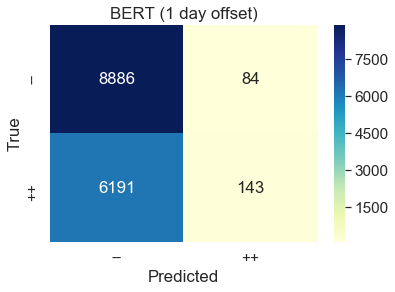

In [114]:
ax = plt.subplot()
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('BERT (1 day offset)')
ax.xaxis.set_ticklabels(['--', '++'])
ax.yaxis.set_ticklabels(['--', '++'])